<a href="https://colab.research.google.com/github/surajss28/Data-Analysis-Project/blob/main/Zomato_Banglore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project - Zomato Restaurants in Banglore

Data Source - kaggle.com

Desription : The data is taken from the kaggle data sheet for doing data analysis. The data is telling about Restaurants in Banglore which provide zomato service.




## Data Preparation And Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [ ]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Renaming the columns for our simplicty

In [ ]:
df.rename(columns={'listed_in(city)':'city', 'listed_in(type)':'type','approx_cost(for two people)':'costfor2'},inplace=True)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'costfor2',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
df.dtypes

url             object
address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
phone           object
location        object
rest_type       object
dish_liked      object
cuisines        object
costfor2        object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [ ]:
df['costfor2'] = df['costfor2'].str.replace(",","").astype(float)

In [ ]:
df.dtypes

url              object
address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
phone            object
location         object
rest_type        object
dish_liked       object
cuisines         object
costfor2        float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

### Checking For Null and Unavailble values

In [ ]:
df.isna().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
costfor2          346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

### Droping Unwanted columns

In [ ]:
df = df.drop(['url','address','phone','menu_item'],axis = 1)

In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costfor2,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [ ]:
df['name'].nunique()

8792

## Exploratory Data Analysis and Visualization



### ckecking online order availability

In [ ]:
df.online_order.value_counts

<bound method IndexOpsMixin.value_counts of 0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object>

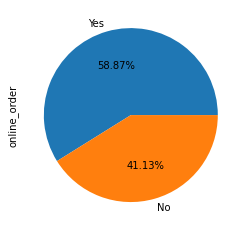

In [ ]:
df.online_order.value_counts().plot(kind='pie',autopct='%1.2f%%')

###checking advanced booking of table

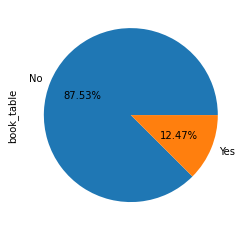

In [ ]:
df.book_table.value_counts().plot(kind='pie',autopct='%1.2f%%')

###looking the restaurants type and their number.

In [ ]:
restaurant_type = df.rest_type.value_counts()

In [ ]:
restaurant_type

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Cafe, Food Court                  2
Pop Up                            2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

###what kind of meal will get in banglore ?

In [ ]:
meal_type = df.type.value_counts()

In [ ]:
meal_type

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: type, dtype: int64

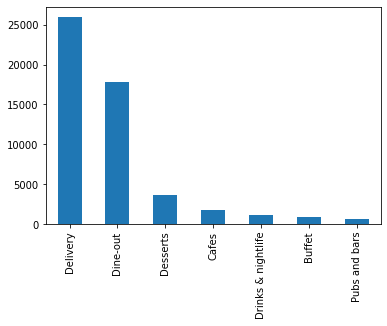

In [ ]:
meal_type.plot(kind='bar')

###which restaurants are visited most?

In [ ]:
unique_name = df.name.value_counts()

In [ ]:
unique_name

Cafe Coffee Day              96
Onesta                       85
Just Bake                    73
Empire Restaurant            71
Five Star Chicken            70
                             ..
Mothers Recipe Restaurant     1
Bawarchy Hotel                1
Sri Vasavi Super Sandwich     1
Baba's Food Center            1
Begum's Biriyani              1
Name: name, Length: 8792, dtype: int64

###How many cities are having restaurants and their count.

In [ ]:
unique_city = df.city.value_counts()

In [ ]:
unique_city

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: city, dtype: int64

###Which dishes has got maximum likes.

In [ ]:
dishes = df.dish_liked.value_counts()

In [ ]:
dishes

Biryani                                                                                         182
Chicken Biryani                                                                                  73
Friendly Staff                                                                                   69
Waffles                                                                                          68
Paratha                                                                                          57
                                                                                               ... 
Andhra Chicken Curry, Fried Rice, Biryani                                                         1
Rajma Chawal                                                                                      1
Noodles, Chicken Wings, Chop Suey, Chilli Chicken, Honey Chilli Wings, Spring Chicken             1
Noodles, Dragon Chicken, Kung Pao Chicken, Dragon Rolls, Chicken Lollipop, Prawn, Clear Soup      1


###which restaurant has got more number of votes? and theire restaurant type.

In [ ]:
df1 = df.groupby(['name'])['votes'].sum()

In [ ]:
max_votes = df1.sort_values(ascending=False)

In [ ]:
max_votes

name
Onesta                 347520
Truffles               301059
Empire Restaurant      229808
Hammered               180602
The Black Pearl        172122
                        ...  
Mughal's                    0
Mukesh Sweet Centre         0
Multi Kitchen               0
Multi Ruchish               0
sCoolMeal                   0
Name: votes, Length: 8792, dtype: int64

In [ ]:
top_votes = max_votes[:15]

In [ ]:
top_votes

name
Onesta                         347520
Truffles                       301059
Empire Restaurant              229808
Hammered                       180602
The Black Pearl                172122
Meghana Foods                  129557
Barbeque Nation                108425
Smally's Resto Cafe            102877
Byg Brewski Brewing Company     99531
Gilly's Restobar                98808
Arbor Brewing Company           92362
House Of Commons                90573
Chutney Chang                   89910
Fenny's Lounge And Kitchen      89183
AB's - Absolute Barbecues       86418
Name: votes, dtype: int64

In [ ]:
rest=[]

In [ ]:
rest.append(df.loc[df['name']=='Onesta'].rest_type[:1])


In [ ]:
rest.append(df.loc[df['name']=='Empire Restaurant'].rest_type[:1])

In [ ]:
rest.append(df.loc[df['name']=='Truffles'].rest_type[:1])

In [ ]:
rest.append(df.loc[df['name']=='The Black Pearl'].rest_type[:1])

In [ ]:
rest.append(df.loc[df['name']=='Hammered'].rest_type[:1])

In [ ]:
rest

[7    Casual Dining, Cafe
 Name: rest_type, dtype: object, 38    Casual Dining
 Name: rest_type, dtype: object, 5044    Cafe
 Name: rest_type, dtype: object, 3762    Casual Dining, Bar
 Name: rest_type, dtype: object, 5103    Pub, Cafe
 Name: rest_type, dtype: object]

###looking at the maximun and minimum costs and votes.

In [ ]:
df.describe()

,votes,costfor2
count,51717.000000,51371.000000
mean,283.697527,555.431566
std,803.838853,438.850728
min,0.000000,40.000000
25%,7.000000,300.000000
50%,41.000000,400.000000
75%,198.000000,650.000000
max,16832.000000,6000.000000


In [ ]:
df.costfor2.max()

6000.0

In [ ]:
df.loc[df['costfor2']==6000]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,costfor2,reviews_list,type,city
19139,Le Cirque Signature - The Leela Palace,No,Yes,4.3/5,126,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",Dine-out,Indiranagar
45618,Le Cirque Signature - The Leela Palace,No,Yes,4.3 /5,128,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",Dine-out,Old Airport Road


###Which location have maximum restaurants?

In [ ]:
df.location.value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

### Which city having a more number of location?

In [ ]:
df2 = df[['city','location']]

In [ ]:
df2[:3]

,city,location
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari


In [ ]:
df3 = df2.groupby(['city'])

In [ ]:
df3

In [ ]:
for city, city_df in df3:
  print(city)
  print(city_df)

BTM
      city               location
8260   BTM                    BTM
8261   BTM                    BTM
8262   BTM                    BTM
8263   BTM                    BTM
8264   BTM                    BTM
...    ...                    ...
11534  BTM  Koramangala 4th Block
11535  BTM  Koramangala 7th Block
11536  BTM                    HSR
11537  BTM               JP Nagar
11538  BTM  Koramangala 4th Block

[3279 rows x 2 columns]
Banashankari
             city      location
0    Banashankari  Banashankari
1    Banashankari  Banashankari
2    Banashankari  Banashankari
3    Banashankari  Banashankari
4    Banashankari  Basavanagudi
..            ...           ...
858  Banashankari  Banashankari
859  Banashankari  Banashankari
860  Banashankari  Banashankari
861  Banashankari  Banashankari
862  Banashankari  Basavanagudi

[863 rows x 2 columns]
Bannerghatta Road
                   city           location
863   Bannerghatta Road  Bannerghatta Road
864   Bannerghatta Road  Bannerghatta 

# Conclusion and Summary


##Insights


###There is No menu data is given for all the dataset hence drop the column.

###seems to be more than 8500 restaurants in banglore.

###There are 59% Restaurants in Banglore who is taking online orders.

###Seems like 88% Restaurants has not giving service of advnaced booking table.

###data is talking about 30 cities in banglore.

###Most of the Restaurants having delivery and dine-out type.

###Most of the people liked biryani.

###Onesta which a cafe has got highest number of votes.

###most of the votes are given to the cafe type reastaurants and casual dining. So we can say that people are enjoying the cafes most.

###Restaurants near airports are expensive.

###Average cost for 2 people in banglore is around 550.

###BTM location has highest number of restaurants.

###BTM city has most Number of restaurants


# Future Scope

### We can add city population in order to calculate relation between number of restaurants and population.

### If we get inforamtion about how many people are visiting restaurants in respected location then we can calculate percentage of people are actully enjoying restaurants.